In [1]:
import numpy as np
import pandas as pd
import warnings
from matplotlib import rc
rc('font', family='AppleGothic') 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('./Data/feature.pkl')

In [3]:
industry_group = df.loc[:,('FnGuide Industry Group')].iloc[:, -1].dropna().unique()

In [4]:
industry_group

array(['하드웨어', '제약 및 바이오', '반도체', '소재', '자동차 및 부품', '소프트웨어', '자본재', '은행',
       '에너지', '내구 소비재 및 의류', '보험', '음식료 및 담배', '유틸리티', '통신서비스', '운송',
       '생활용품', '기타금융', '미디어', '소비자 서비스', '디스플레이', '증권', '상업서비스', '유통',
       '의료장비 및 서비스', '부동산'], dtype=object)

In [5]:
np.where(df.loc[:, ('FnGuide Industry Group')].iloc[:,-1] == '소프트웨어')

(array([   7,   10,   27,   34,   37,   79,   85,  100,  106,  206,  219,
         223,  238,  250,  254,  255,  256,  284,  303,  323,  359,  370,
         371,  378,  416,  463,  474,  501,  504,  511,  573,  620,  625,
         642,  648,  677,  702,  716,  719,  725,  773,  783,  818,  839,
         840,  843,  846,  884,  908,  935,  937,  938,  946,  955,  961,
         979,  989, 1005, 1051, 1053, 1082, 1088, 1093, 1098, 1105, 1138,
        1141, 1152, 1154, 1196, 1230, 1248, 1271, 1274, 1287, 1335, 1355,
        1356, 1360, 1364, 1367, 1369, 1372, 1374, 1395, 1397, 1410, 1415,
        1420, 1436, 1453, 1486, 1496, 1499, 1500, 1514, 1528, 1539, 1541,
        1550, 1553, 1557, 1561, 1590, 1598, 1600, 1613, 1620, 1643, 1647,
        1656, 1669, 1693, 1699, 1703, 1714, 1732, 1734, 1749, 1782, 1789,
        1797, 1805, 1810, 1831, 1839, 1846, 1849, 1850, 1851, 1855, 1860,
        1863, 1866, 1869, 1875, 1884, 1892, 1893, 1897, 1914, 1921, 1946,
        1954, 1956, 1968, 1974, 1990, 

In [538]:
ex_sector_list

MultiIndex([( 'SK하이닉스', 'A000660'),
            (  'SK스퀘어', 'A402340'),
            (   '리노공업', 'A058470'),
            (  'DB하이텍', 'A000990'),
            (  '동진쎄미켐', 'A005290'),
            (   '솔브레인', 'A357780'),
            (  'LX세미콘', 'A108320'),
            (  '원익IPS', 'A240810'),
            (  '한미반도체', 'A042700'),
            (   '티씨케이', 'A064760'),
            ...
            (    '테스텍', 'A048510'),
            ('에스에이치엔엘', 'A050320'),
            (  '아이피에스', 'A051820'),
            ( '국제엘렉트릭', 'A053740'),
            ('SKC 솔믹스', 'A057500'),
            (    '티이씨', 'A067950'),
            (    '세미텍', 'A081220'),
            ( '이엠네트웍스', 'A087730'),
            (  '신성이엔지', 'A104110'),
            ( '신성에프에이', 'A104120')],
           names=['Symbol Name', 'Symbol'], length=159)

In [6]:
industry_group = df.loc[:,('FnGuide Industry Group')].iloc[:, -1].dropna().unique()

total_df = []

for x in industry_group:
    industry_name = x

    ex_sector_list = df.index[np.where(df.loc[:, ('FnGuide Industry Group')].iloc[:,-1] == industry_name)]
    tmp = pd.DataFrame(df.loc[(ex_sector_list), :])

    total_df.append(tmp.mean().unstack(0).dropna())


In [7]:
raw_df = pd.concat(total_df, axis=1, keys=industry_group)

In [670]:
raw_d

,투자후1분기뒤수익률,시가총액_z_score,당기순이익_시가총액_1Q_standardized,지배주주지분_시가총액_1Q_standardized,매출총이익_시가총액_1Q_standardized,영업이익_시가총액_1Q_standardized,계속사업이익_시가총액_1Q_standardized,총포괄이익_시가총액_1Q_standardized,영업활동현금흐름_시가총액_4Q_standardized,ROE영업이익_1Q_standardized,...,매출액대비_영업이익률4Q_stdized_4Q증가_TF,매출액대비_당기순이익률4Q_stdized_4Q증가_TF,매출액대비_총포괄이익률4Q_stdized_4Q증가_TF,CB보유TF,BW보유TF,자본금_12분기전대비증가_TF,영업이익_흑자TF,계속사업이익_흑자TF,당기순이익_흑자TF,총포괄이익_흑자TF
2004-03-31,-0.114975,-0.002817,-0.006722,-0.465926,-0.310047,-0.072152,-0.011860,-0.073622,-0.111024,0.020084,...,0.284884,0.220930,0.622093,0.079602,0.024876,0.598291,0.243781,0.218905,0.218905,0.206468
2004-05-31,-0.120581,-0.013268,-0.120766,-0.459490,-0.334738,-0.258699,-0.119561,-0.087983,-0.120301,-0.024762,...,0.197605,0.365269,0.455090,0.052239,0.017413,0.577778,0.266169,0.278607,0.278607,0.261194
2004-08-31,-0.044827,-0.027321,-0.007002,-0.376983,-0.285234,-0.081837,-0.007002,0.001594,-0.081301,-0.084791,...,0.246988,0.265060,0.307229,0.057214,0.024876,0.555556,0.266169,0.268657,0.268657,0.268657
2004-11-30,0.175476,-0.042687,0.058546,-0.322389,-0.228909,0.014563,0.058546,0.058803,0.016554,0.025190,...,0.339394,0.303030,0.315152,0.054726,0.017413,0.529148,0.281095,0.286070,0.286070,0.286070
2005-03-31,-0.039358,-0.050233,0.052588,-0.290133,-0.191696,0.029430,0.052725,0.013835,-0.024947,0.013887,...,0.830189,0.905660,0.245283,0.054726,0.019900,0.462810,0.221393,0.194030,0.194030,0.164179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,-0.086326,-0.038659,-0.116362,-0.249552,-0.268731,-0.303719,-0.223310,-0.123484,-0.118655,-0.028306,...,0.821277,0.604255,0.561702,0.084577,0.019900,0.631206,0.388060,0.402985,0.407960,0.412935
2021-11-30,0.073584,-0.031346,-0.018166,-0.244338,-0.218741,-0.150128,-0.019942,0.020108,-0.089982,-0.018744,...,0.844262,0.053279,0.053279,0.101990,0.017413,0.639286,0.430348,0.460199,0.452736,0.472637
2022-03-31,-0.004664,-0.023279,-0.117653,-0.249597,-0.241081,-0.144176,-0.107185,-0.131265,-0.100936,-0.017655,...,0.633065,0.173387,0.185484,0.092040,0.017413,0.657143,0.402985,0.385572,0.380597,0.388060
2022-05-31,-0.101283,-0.020771,-0.096607,-0.237760,-0.206362,-0.170496,-0.091951,-0.037550,-0.106767,-0.002649,...,0.329218,0.106996,0.127572,0.082090,0.012438,0.652174,0.398010,0.425373,0.430348,0.427861


In [8]:
a = ex_sector_list
tmp = pd.DataFrame(df.loc[(a), :])

pd.DataFrame(tmp.mean()).unstack(0).dropna()

0                                          \
           투자후1분기뒤수익률 시가총액_z_score 당기순이익_시가총액_1Q_standardized   
2004-03-31  -0.051174    -0.091002                   0.038719   
2004-05-31  -0.018692    -0.097127                  -0.028049   
2004-08-31   0.124908    -0.107576                  -0.062086   
2004-11-30   0.686234    -0.113414                  -0.297184   
2005-03-31  -0.019366    -0.114943                   0.052230   
...               ...          ...                        ...   
2021-08-31  -0.174278    -0.060302                   0.255495   
2021-11-30  -0.071685    -0.061973                   0.269126   
2022-03-31  -0.097036    -0.065942                   0.657200   
2022-05-31  -0.159048    -0.067620                   0.438447   
2022-08-31  -0.137302    -0.071604                   0.342221   

                                                                   \
           지배주주지분_시가총액_1Q_standardized 매출총이익_시가총액_1Q_standardized   
2004-03-31                   -0.050194                   0.028955   
2004-05-31                   -0.047984                  -0.161378   
2004-08-31                   -0.053634                  -0.247857   
2004-11-30                   -0.076231                  -0.198754   
2005-03-31                   -0.127065                  -0.076898   
...                                ...                        ...   
2021-08-31                    0.222555                  -0.174233   
2021-11-30                    0.173198                  -0.185662   
2022-03-31                    0.410149                   0.006026   
2022-05-31                    0.556257                  -0.086621   
2022-08-31                    0.667658                  -0.149554   

                                                                  \
           영업이익_시가총액_1Q_standardized 계속사업이익_시가총액_1Q_standardized   
2004-03-31                 -0.154903                    0.032767   
2004-05-31                 -0.123813                   -0.026833   
2004-08-31                 -0.336827                   -0.062086   
2004-11-30                 -0.327505                   -0.297184   
2005-03-31                 -0.203936                    0.052367   
...                              ...                         ...   
2021-08-31                  0.307916                    0.626661   
2021-11-30                  0.344247                    0.292796   
2022-03-31                  0.804864                    0.660156   
2022-05-31                  0.559053                    0.448212   
2022-08-31                  0.313180                    0.435163   

                                                                     \
           총포괄이익_시가총액_1Q_standardized 영업활동현금흐름_시가총액_4Q_standardized   
2004-03-31                  -0.006528                      1.810055   
2004-05-31                  -0.209882                      1.613283   
2004-08-31                  -0.114056                      1.459882   
2004-11-30                  -0.358943                      0.396686   
2005-03-31                   0.089652                      0.566955   
...                               ...                           ...   
2021-08-31                   0.241976                      0.866684   
2021-11-30                   0.209558                      0.074245   
2022-03-31                   0.604296                     -0.012783   
2022-05-31                   0.419122                     -0.574255   
2022-08-31                   0.321632                     -0.682410   

                                    ...                                \
           ROE영업이익_1Q_standardized  ... 매출액대비_영업이익률4Q_stdized_4Q증가_TF   
2004-03-31                0.055410  ...                      0.000000   
2004-05-31                0.024563  ...                      0.000000   
2004-08-31               -0.008057  ...                      0.000000   
2004-11-30                0.024648  ...                      0.000000   
2005-03-31                0.0

시계열 길이 짧은것 어떻게 할 지?

In [9]:
def create_xy_df (asset_sector, raw_df):
    
    tmp = pd.DataFrame(raw_df.loc[(asset_sector), :]).T
    '''y'''
    y = tmp['투자후1분기뒤수익률'].T
    '''x'''

    x_len = (tmp.columns.get_level_values(0) == '투자후1분기뒤수익률').sum()
    tmp_x = tmp[tmp.columns[x_len:]].T.unstack(0)

    tmp_x.columns = tmp_x.columns.get_level_values(2)
    x = tmp_x.iloc[:, :-1]
    
    return x, y

23까지는 float, 23부터는 object

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
tree = DecisionTreeClassifier(random_state=1, max_depth=2)

In [13]:
#for stock in ex_sector_list[0:1]:

stock = ex_sector_list[1]

x, y = create_xy_df(stock, df)

y = np.where(y > 0, 1, 0)
x = x[x.columns[:23]].astype(float)

mean_data = x.mean()

for idx in x.columns:
    arr = x[idx]
    x[idx] = arr.fillna(mean_data[19])



In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

X_train_scale = scaler.fit_transform(X_train)
X_test_scale  = scaler.fit_transform(X_test)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63, 23), (28, 23), (63, 1), (28, 1))

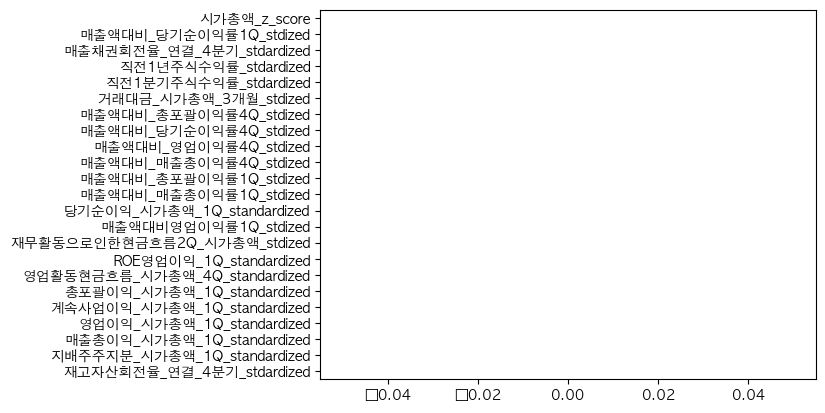

0.6071428571428571


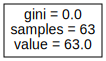

In [16]:
fitting = tree.fit(X_train_scale, y_train)
y_pred = fitting.predict(X_test_scale)
acc = accuracy_score(y_test, y_pred)

for i in range(0, 10):
    globals()['reg_{}'.format(i)] = 0

feature_imp = pd.Series(fitting.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

export_graphviz(
    fitting,
    out_file = 'decision_tree.dot',
    class_names = ['no','yes'],
    feature_names = X_train.columns,
    impurity=True, filled=True
)

print(acc)

treedot = graphviz.Source(open('decision_tree.dot').read())
treedot

In [17]:
#for stock in ex_sector_list[0:1]:
industry_name = industry_group[0]

ex_sector_list = df.index[np.where(df.loc[:, ('FnGuide Industry Group')].iloc[:,-1] == industry_name)]

for idx in len(ex_sector_list):

    stock = ex_sector_list[idx]

    x, y = create_xy_df(stock, df)

    y = np.where(y > 0, 1, 0)
    x = x[x.columns[:23]].astype(float)

    mean_data = x.mean()

    for idx in x.columns:
        arr = x[idx]
        x[idx] = arr.fillna(mean_data[19])

    

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

X_train_scale = scaler.fit_transform(X_train)
X_test_scale  = scaler.fit_transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
fitting = tree.fit(X_train_scale, y_train)
y_pred = fitting.predict(X_test_scale)
acc = accuracy_score(y_test, y_pred)

for i in range(0, 10):
    globals()['reg_{}'.format(i)] = 0

feature_imp = pd.Series(fitting.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

# export_graphviz(
#     fitting,
#     out_file = 'decision_tree.dot',
#     class_names = ['no','yes'],
#     feature_names = X_train.columns,
#     impurity=True, filled=True
# )

print(stock)
print(len(y_test))
print(acc)

treedot = graphviz.Source(open('decision_tree.dot').read())
treedot

TypeError: 'int' object is not iterable

In [590]:
x

,시가총액_z_score,당기순이익_시가총액_1Q_standardized,지배주주지분_시가총액_1Q_standardized,매출총이익_시가총액_1Q_standardized,영업이익_시가총액_1Q_standardized,계속사업이익_시가총액_1Q_standardized,총포괄이익_시가총액_1Q_standardized,영업활동현금흐름_시가총액_4Q_standardized,ROE영업이익_1Q_standardized,재무활동으로인한현금흐름2Q_시가총액_stdized,...,매출액대비_총포괄이익률1Q_stdized,매출액대비_매출총이익률4Q_stdized,매출액대비_영업이익률4Q_stdized,매출액대비_당기순이익률4Q_stdized,매출액대비_총포괄이익률4Q_stdized,거래대금_시가총액_3개월_stdized,직전1분기주식수익률_stdardized,직전1년주식수익률_stdardized,매출채권회전율_연결_4분기_stdardized,재고자산회전율_연결_4분기_stdardized
2000-05-31,0.245465,-0.070689,-0.208331,-0.374177,-0.352946,-0.070689,-0.075268,0.120125,0.120125,0.120125,...,0.257224,0.120125,0.120125,0.120125,0.120125,0.120125,0.120125,0.120125,0.120125,0.120125
2000-08-31,0.255774,-0.013109,-0.458300,-0.415865,-0.303424,-0.012736,0.010069,0.120125,-0.059088,0.120125,...,-0.004117,0.120125,0.120125,0.120125,0.120125,1.082083,-0.305222,0.120125,0.120125,0.120125
2000-11-30,0.059980,-0.014779,-0.350288,-0.363005,-0.290443,-0.015076,-0.004366,0.120125,0.120125,0.120125,...,-1.280981,0.120125,0.120125,0.120125,0.120125,0.822448,-1.284483,0.120125,0.120125,0.120125
2001-03-31,0.042017,0.104329,-0.316962,-0.300730,0.013801,0.104470,0.163037,0.120125,0.061045,0.120125,...,0.092089,0.037262,-0.415009,0.046456,0.099272,1.570188,-0.352498,0.120125,-0.108820,0.120125
2001-05-31,0.154245,0.032752,-0.357035,-0.409009,-0.383334,0.033312,-0.003348,0.120125,0.026451,0.120125,...,0.058614,-0.076179,-0.154031,-0.006026,0.038468,0.845492,1.836380,-0.826767,-0.072287,0.120125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,3.000000,0.021112,-0.886766,-0.327221,-0.267627,0.032187,-0.006971,-0.140262,-0.015894,-0.139767,...,0.024753,0.180382,0.040028,0.021703,0.021789,-0.345609,-0.290165,1.043272,-0.016227,-0.045528
2022-03-31,3.000000,0.095425,-0.801229,-0.291388,-0.179627,0.094653,-0.005635,-0.067830,0.018046,-0.193370,...,0.047002,0.054029,0.049066,0.039940,0.040233,-0.357658,-0.706949,0.200201,-0.019683,-0.048140
2022-05-31,3.000000,0.407700,-0.745717,-0.242930,-0.232626,0.417085,0.346530,-0.016268,0.031002,-0.105996,...,0.051438,0.054574,0.047973,0.044039,0.044141,-0.424066,-0.817733,-0.599596,-0.020868,-0.047016
2022-08-31,3.000000,-0.127271,-0.740771,-0.243166,-0.280283,-0.126291,-0.120000,-0.049066,-0.019262,-0.110719,...,0.030479,0.055424,0.046580,0.037271,0.035936,-0.410649,-0.196048,-1.347263,-0.001714,-0.049221


In [18]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

#for stock in ex_sector_list[0:1]:

stock = ex_sector_list[1]

x, y = create_xy_df(stock, df)

y = np.where(y > 0, 1, 0)
x = x[x.columns[:23]].astype(float)

mean_data = x.mean()

for idx in x.columns:
    arr = x[idx]
    x[idx] = arr.fillna(mean_data[19])


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

X_train_scale = scaler.fit_transform(X_train)
X_test_scale  = scaler.fit_transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
fitting = logit.fit(X_train_scale, y_train)
y_pred = fitting.predict(X_test_scale)
acc = accuracy_score(y_test, y_pred)

for i in range(0, 10):
    globals()['reg_{}'.format(i)] = 0

#feature_imp = pd.Series(fitting.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# sns.barplot(x=feature_imp, y=feature_imp.index)
# plt.show()

# export_graphviz(
#     fitting,
#     out_file = 'decision_tree.dot',
#     class_names = ['no','yes'],
#     feature_names = X_train.columns,
#     impurity=True, filled=True
# )

print(stock)
print(len(y_test))
print(acc)

# treedot = graphviz.Source(open('decision_tree.dot').read())
# treedot

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [29]:
industry_group

array(['하드웨어', '제약 및 바이오', '반도체', '소재', '자동차 및 부품', '소프트웨어', '자본재', '은행',
       '에너지', '내구 소비재 및 의류', '보험', '음식료 및 담배', '유틸리티', '통신서비스', '운송',
       '생활용품', '기타금융', '미디어', '소비자 서비스', '디스플레이', '증권', '상업서비스', '유통',
       '의료장비 및 서비스', '부동산'], dtype=object)

In [30]:
reg_df = pd.DataFrame(index=industry_group)
reg_df

""
하드웨어
제약 및 바이오
반도체
소재
자동차 및 부품
소프트웨어
자본재
은행
에너지
내구 소비재 및 의류


In [28]:
industry_name = industry_group[0]

ex_sector_list = df.index[np.where(df.loc[:, ('FnGuide Industry Group')].iloc[:,-1] == industry_name)]


In [442]:
from tqdm import tqdm

In [19]:
industry_name = industry_group[5]

ex_sector_list = df.index[np.where(df.loc[:, ('FnGuide Industry Group')].iloc[:,-1] == industry_name)]

model_list = []
stock_list = []

reg_df = pd.DataFrame(index=industry_group)

for num, stock in tqdm(enumerate(ex_sector_list)):

    y = 

    #stock = ex_sector_list[0]
    try:
        x, y = create_xy_df(stock, df)

        y = np.where(y > 0, 1, 0)
        x = x[x.columns[:23]].astype(float)

        mean_data = x.mean()

        for idx in x.columns:
            arr = x[idx]
            x[idx] = arr.fillna(mean_data[19])

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)

        X_train_scale = scaler.fit_transform(X_train)
        X_test_scale  = scaler.fit_transform(X_test)

        fitting = tree.fit(X_train_scale, y_train)
        y_pred = fitting.predict(X_test_scale)
        acc = accuracy_score(y_test, y_pred)

        globals()['reg_{}'.format(num)] = fitting
        model_list.append(globals()['reg_{}'.format(num)])
        stock_list.append(stock)
    except:
        pass

SyntaxError: invalid syntax (4057152970.py, line 10)

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score, recall_score, precision_score

In [564]:
stock_list[0][0]

'NAVER'

반도체 섹터 예측해본거? 이거 맞나?

In [570]:
y_train.shape

(63, 1)

In [23]:
final_reg = VotingClassifier(estimators=
    [(f'{x[0][0]}', x[1]) for x in list(zip(stock_list, model_list))], voting='hard')

final_reg.fit(X_train_scale, y_train)
y_pred = final_reg.predict(X_test_scale)

accuracy_score(y_pred, y_test)
f1_score(y_pred, y_test), recall_score(y_pred, y_test), precision_score(y_pred, y_test)


NameError: name 'VotingClassifier' is not defined

In [25]:
from tqdm import tqdm
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score, recall_score, precision_score

In [27]:
ex_sector_list

MultiIndex([(      '삼성전자', 'A005930'),
            (  'LG에너지솔루션', 'A373220'),
            (     '삼성SDI', 'A006400'),
            (    '에코프로비엠', 'A247540'),
            (      '삼성전기', 'A009150'),
            (      '엘앤에프', 'A066970'),
            (     'LG이노텍', 'A011070'),
            ('SK아이이테크놀로지', 'A361610'),
            (      '에코프로', 'A086520'),
            (   '일진머티리얼즈', 'A020150'),
            ...
            (      '엔스퍼트', 'A098400'),
            (       '모린스', 'A110310'),
            (     '원익피앤이', 'A131390'),
            (        '모다', 'A149940'),
            (     '에이치엔티', 'A176440'),
            (       '테라셈', 'A182690'),
            (   '미래테크놀로지', 'A213090'),
            (      '아이엠텍', 'A226350'),
            (    '3노드디지탈', 'A900010'),
            (    '코웰이홀딩스', 'A900020')],
           names=['Symbol Name', 'Symbol'], length=402)

In [31]:
reg_df = pd.DataFrame(index=industry_group)


for industry_name in tqdm(reg_df.index):

    ex_sector_list = df.index[np.where(df.loc[:, ('FnGuide Industry Group')].iloc[:,-1] == industry_name)]

    model_list = []
    stock_list = []

    x_train_df = pd.DataFrame()
    y_train_df = pd.DataFrame()
    x_test_df = pd.DataFrame()
    y_test_df = pd.DataFrame()

    for num, stock in tqdm(enumerate(ex_sector_list)):

        x, y = create_xy_df(stock, df)
        
        if y.isna().sum().item() == 1:

        #stock = ex_sector_list[0]
            try:
                y = np.where(y > 0, 1, 0)
                y = pd.DataFrame(y, index=x.index)
                x = x[x.columns[:23]].astype(float)

                mean_data = x.mean()

                for idx in x.columns:
                    arr = x[idx]
                    x[idx] = arr.fillna(mean_data[19])

                X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

                X_train_scale = scaler.fit_transform(X_train)
                X_test_scale  = scaler.fit_transform(X_test)

                fitting = tree.fit(X_train_scale, y_train)
                y_pred = fitting.predict(X_test_scale)
                acc = accuracy_score(y_test, y_pred)

                globals()['reg_{}'.format(num)] = fitting
                model_list.append(globals()['reg_{}'.format(num)])
                stock_list.append(stock)

                X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

                x_train_df = pd.concat([x_train_df, X_train], ignore_index=True)
                x_test_df  = pd.concat([x_test_df,   X_test], ignore_index=True)
                y_train_df = pd.concat([y_train_df, y_train], ignore_index=True)
                y_test_df  = pd.concat([y_test_df,   y_test], ignore_index=True)
                

            except:
                pass

        else:
            pass
        
    final_reg = VotingClassifier(estimators=
        [(f'{x[0][0]}', x[1]) for x in list(zip(stock_list, model_list))], voting='hard')

    x_train_df_scale = scaler.fit_transform(x_train_df)
    x_test_df_scale = scaler.fit_transform(x_test_df)

    final_reg.fit(x_train_df_scale, y_train_df)
    y_pred = final_reg.predict(x_test_df_scale)


    accuracy_score(y_pred, y_test_df), f1_score(y_pred, y_test_df), recall_score(y_pred, y_test_df), precision_score(y_pred, y_test_df)

    reg_df.loc[industry_name,'acc'] = accuracy_score(y_pred, y_test_df)
    reg_df.loc[industry_name,'f1'] = f1_score(y_pred, y_test_df)

402it [00:05, 71.85it/s]0:00<?, ?it/s]
217it [00:02, 72.47it/s]0:06<02:25,  6.07s/it]
159it [00:01, 80.74it/s]0:09<01:44,  4.56s/it]
339it [00:04, 71.22it/s]0:11<01:15,  3.41s/it]
180it [00:02, 66.59it/s]0:22<02:11,  6.27s/it]
250it [00:03, 72.49it/s]0:25<01:46,  5.33s/it]
356it [00:05, 69.18it/s]0:29<01:29,  4.72s/it]
48it [00:00, 79.11it/s]00:37<01:46,  5.89s/it]
68it [00:00, 79.47it/s]00:38<01:11,  4.21s/it]
200it [00:02, 72.84it/s]0:39<00:50,  3.18s/it]
19it [00:00, 65.02it/s][00:42<00:48,  3.22s/it]
137it [00:02, 67.83it/s]00:42<00:32,  2.33s/it]
16it [00:00, 61.50it/s][00:45<00:31,  2.43s/it]
12it [00:00, 82.40it/s][00:45<00:21,  1.78s/it]
46it [00:00, 64.82it/s][00:46<00:14,  1.29s/it]
73it [00:00, 73.64it/s][00:46<00:11,  1.15s/it]
190it [00:02, 83.85it/s]00:47<00:10,  1.12s/it]
111it [00:01, 72.98it/s]00:50<00:11,  1.48s/it]
59it [00:00, 77.12it/s][00:51<00:10,  1.51s/it]
127it [00:01, 77.18it/s]00:52<00:07,  1.29s/it]
36it [00:00, 61.83it/s][00:54<00:07,  1.41s/it]
50it [00:0

In [36]:
reg_df.to_pickle('baggin_reg.pkl')

In [528]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

model_list = []
stock_list = []

x_train_df = pd.DataFrame()
y_train_df = pd.DataFrame()
x_test_df = pd.DataFrame()
y_test_df = pd.DataFrame()

for num, stock in tqdm(enumerate(ex_sector_list)):

    x, y = create_xy_df(stock, df)
    
    if y.isna().sum().item() == 1:

    #stock = ex_sector_list[0]
        try:
            y = np.where(y > 0, 1, 0)
            y = pd.DataFrame(y, index=x.index)
            x = x[x.columns[:23]].astype(float)

            mean_data = x.mean()

            for idx in x.columns:
                arr = x[idx]
                x[idx] = arr.fillna(mean_data[19])

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

            X_train_scale = scaler.fit_transform(X_train)
            X_test_scale  = scaler.fit_transform(X_test)

            fitting = logit.fit(X_train_scale, y_train)
            y_pred = fitting.predict(X_test_scale)
            acc = accuracy_score(y_test, y_pred)

            globals()['reg_{}'.format(num)] = fitting
            model_list.append(globals()['reg_{}'.format(num)])
            stock_list.append(stock)

            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

            x_train_df = pd.concat([x_train_df, X_train], ignore_index=True)
            x_test_df  = pd.concat([x_test_df,   X_test], ignore_index=True)
            y_train_df = pd.concat([y_train_df, y_train], ignore_index=True)
            y_test_df  = pd.concat([y_test_df,   y_test], ignore_index=True)
            

        except:
            pass

    else:
        pass
    
final_reg = VotingClassifier(estimators=
    [(f'{x[0][0]}', x[1]) for x in list(zip(stock_list, model_list))], voting='hard')

x_train_df_scale = scaler.fit_transform(x_train_df)
x_test_df_scale = scaler.fit_transform(x_test_df)

final_reg.fit(x_train_df_scale, y_train_df)
y_pred = final_reg.predict(x_test_df_scale)


accuracy_score(y_pred, y_test_df), f1_score(y_pred, y_test_df), recall_score(y_pred, y_test_df), precision_score(y_pred, y_test_df)


159it [00:01, 82.83it/s]


(0.5510835913312694,
 0.45692883895131087,
 0.5754716981132075,
 0.37888198757763975)

In [532]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

model_list = []
stock_list = []

x_train_df = pd.DataFrame()
y_train_df = pd.DataFrame()
x_test_df = pd.DataFrame()
y_test_df = pd.DataFrame()

for num, stock in tqdm(enumerate(ex_sector_list)):

    x, y = create_xy_df(stock, df)
    
    if y.isna().sum().item() == 1:

    #stock = ex_sector_list[0]
        try:
            y = np.where(y > 0, 1, 0)
            y = pd.DataFrame(y, index=x.index)
            x = x[x.columns[:23]].astype(float)

            mean_data = x.mean()

            for idx in x.columns:
                arr = x[idx]
                x[idx] = arr.fillna(mean_data[19])

            X_train, X_test, y_train, y_test = train_test_split(x[:int(len(x)*0.8)], y[:int(len(y)*0.8)], test_size=0.2, shuffle=False)

            X_train_scale = scaler.fit_transform(X_train)
            X_test_scale  = scaler.fit_transform(X_test)

            fitting = gbc.fit(X_train_scale, y_train)
            y_pred = fitting.predict(X_test_scale)
            acc = accuracy_score(y_test, y_pred)

            globals()['reg_{}'.format(num)] = fitting
            model_list.append(globals()['reg_{}'.format(num)])
            stock_list.append(stock)

            X_train, X_test, y_train, y_test = train_test_split(x[int(len(x)*0.8):], y[int(len(x)*0.8):], test_size=0.2, shuffle=False)

            x_train_df = pd.concat([x_train_df, X_train], ignore_index=True)
            x_test_df  = pd.concat([x_test_df,   X_test], ignore_index=True)
            y_train_df = pd.concat([y_train_df, y_train], ignore_index=True)
            y_test_df  = pd.concat([y_test_df,   y_test], ignore_index=True)
            

        except:
            pass

    else:
        pass
    
final_reg = VotingClassifier(estimators=
    [(f'{x[0][0]}', x[1]) for x in list(zip(stock_list, model_list))], voting='hard')

x_train_df_scale = scaler.fit_transform(x_train_df)
x_test_df_scale = scaler.fit_transform(x_test_df)

final_reg.fit(x_train_df_scale, y_train_df)
y_pred = final_reg.predict(x_test_df_scale)


accuracy_score(y_pred, y_test_df), f1_score(y_pred, y_test_df), recall_score(y_pred, y_test_df), precision_score(y_pred, y_test_df)


159it [00:02, 61.29it/s]


(0.47058823529411764, 0.21739130434782608, 0.13157894736842105, 0.625)

In [533]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1, max_depth=2)

model_list = []
stock_list = []

x_train_df = pd.DataFrame()
y_train_df = pd.DataFrame()
x_test_df = pd.DataFrame()
y_test_df = pd.DataFrame()

for num, stock in tqdm(enumerate(ex_sector_list)):

    x, y = create_xy_df(stock, df)
    
    if y.isna().sum().item() == 1:

    #stock = ex_sector_list[0]
        try:
            y = np.where(y > 0, 1, 0)
            y = pd.DataFrame(y, index=x.index)
            x = x[x.columns[:23]].astype(float)

            mean_data = x.mean()

            for idx in x.columns:
                arr = x[idx]
                x[idx] = arr.fillna(mean_data[19])

            X_train, X_test, y_train, y_test = train_test_split(x[:int(len(x)*0.8)], y[:int(len(y)*0.8)], test_size=0.2, shuffle=False)

            X_train_scale = scaler.fit_transform(X_train)
            X_test_scale  = scaler.fit_transform(X_test)

            fitting = tree.fit(X_train_scale, y_train)
            y_pred = fitting.predict(X_test_scale)
            acc = accuracy_score(y_test, y_pred)

            globals()['reg_{}'.format(num)] = fitting
            model_list.append(globals()['reg_{}'.format(num)])
            stock_list.append(stock)

            X_train, X_test, y_train, y_test = train_test_split(x[int(len(x)*0.8):], y[int(len(x)*0.8):], test_size=0.2, shuffle=False)

            x_train_df = pd.concat([x_train_df, X_train], ignore_index=True)
            x_test_df  = pd.concat([x_test_df,   X_test], ignore_index=True)
            y_train_df = pd.concat([y_train_df, y_train], ignore_index=True)
            y_test_df  = pd.concat([y_test_df,   y_test], ignore_index=True)
            

        except:
            pass

    else:
        pass
    
final_reg = VotingClassifier(estimators=
    [(f'{x[0][0]}', x[1]) for x in list(zip(stock_list, model_list))], voting='hard')

x_train_df_scale = scaler.fit_transform(x_train_df)
x_test_df_scale = scaler.fit_transform(x_test_df)

final_reg.fit(x_train_df_scale, y_train_df)
y_pred = final_reg.predict(x_test_df_scale)


accuracy_score(y_pred, y_test_df), f1_score(y_pred, y_test_df), recall_score(y_pred, y_test_df), precision_score(y_pred, y_test_df)

159it [00:02, 78.22it/s]


(0.45588235294117646, 0.3018867924528302, 0.17777777777777778, 1.0)

In [284]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(x)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [269]:
sector = ex_sector_list[0]

tmp = pd.DataFrame(df.loc[(sector), :]).T
'''y'''
y = tmp['투자후1분기뒤수익률'].T
'''x'''

x_len = (tmp.columns.get_level_values(0) == '투자후1분기뒤수익률').sum()
tmp_x = tmp[tmp.columns[x_len:]].T.unstack(0)

tmp_x.columns = tmp_x.columns.get_level_values(2)
x = tmp_x

In [331]:
for sector in ex_sector_list:

    tmp = pd.DataFrame(df.loc[(sector), :]).T
    '''y'''
    y = tmp['투자후1분기뒤수익률'].T
    '''x'''

    x_len = (tmp.columns.get_level_values(0) == '투자후1분기뒤수익률').sum()
    tmp_x = tmp[tmp.columns[x_len:]].T.unstack(0)

    tmp_x.columns = tmp_x.columns.get_level_values(2)
    x = tmp_x.dropna()
    
    if len(y) == len(x):
        pass
    else:
        print(f'{sector}: {len(x)}, {len(y)}')

('SK하이닉스', 'A000660'): 75, 91
('SK스퀘어', 'A402340'): 1, 91
('리노공업', 'A058470'): 75, 91
('DB하이텍', 'A000990'): 73, 91
('동진쎄미켐', 'A005290'): 74, 91
('솔브레인', 'A357780'): 6, 91
('LX세미콘', 'A108320'): 45, 91
('원익IPS', 'A240810'): 23, 91
('한미반도체', 'A042700'): 64, 91
('티씨케이', 'A064760'): 69, 91
('HPSP', 'A403870'): 0, 91
('이오테크닉스', 'A039030'): 74, 91
('SFA반도체', 'A036540'): 74, 91
('해성디에스', 'A195870'): 22, 91
('원익QnC', 'A074600'): 70, 91
('하나머티리얼즈', 'A166090'): 19, 91
('ISC', 'A095340'): 56, 91
('주성엔지니어링', 'A036930'): 74, 91
('에스앤에스텍', 'A101490'): 49, 91
('유진테크', 'A084370'): 62, 91
('넥스틴', 'A348210'): 5, 91
('하나마이크론', 'A067310'): 63, 91
('피에스케이', 'A319660'): 11, 91
('젬백스', 'A082270'): 61, 91
('코미코', 'A183300'): 20, 91
('티에스이', 'A131290'): 43, 91
('두산테스나', 'A131970'): 0, 91
('네패스', 'A033640'): 74, 91
('원익머트리얼즈', 'A104830'): 40, 91
('오킨스전자', 'A080580'): 28, 91
('KEC', 'A092220'): 60, 91
('에프에스티', 'A036810'): 75, 91
('테스', 'A095610'): 55, 91
('엘비세미콘', 'A061970'): 44, 91
('케이씨텍', 'A281820'): 16, 91
(

slice 된 것

In [143]:
sliced = df.loc[:,(slice(None), '삼성전자', slice(None))]

x, y 나누기

In [144]:
features = sliced.columns.get_level_values(2)
sliced.columns = features

a = pd.DataFrame(index = pd.date_range('2000-01-01', '2022-12-31'))
idx = a.resample('Q').last().index
sliced.index = idx

테스트 데이터임

In [146]:
test = sliced.iloc[:-2].fillna(0).iloc[:, :-2]
test['FnGuide Industry Group'] = np.where(test['FnGuide Industry Group'] == '반도체', 1, 2)
test['거래소(시장)'] = np.where(test['거래소(시장)'] == '유가증권시장', 1, 0)
test = test.pct_change()

y = test[['총자산(원)']].iloc[1:]
x = test[test.columns[1:]].iloc[:-1]

In [147]:
x.replace( np.inf,  1, inplace=True)
x.replace(-np.inf, -1, inplace=True)
x.replace( np.NaN,  0, inplace=True)

y.replace( np.inf,  1, inplace=True)
y.replace(-np.inf, -1, inplace=True)
y.replace( np.NaN,  0, inplace=True)

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.fit_transform(X_test.values)

In [159]:
y_train

,총자산(원)
2000-06-30,0.005676
2000-09-30,0.041024
2000-12-31,0.029041
2001-03-31,0.035052
2001-06-30,-0.013617
...,...
2016-12-31,0.059402
2017-03-31,-0.010006
2017-06-30,0.030894
2017-09-30,0.058348


In [161]:
import graphviz
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

trees = DecisionTreeClassifier(random_state=1)
trees.fit(X_train_scaled, y_train)

accuracy_score(y_test, trees.predict(X_test_scaled))

ValueError: Unknown label type: 'continuous'

In [ ]:
y_test

array([[2.05206164e+14],
       [2.03970112e+14],
       [2.17799444e+14],
       [2.19021357e+14],
       [2.20646957e+14],
       [2.12750718e+14],
       [2.17247371e+14],
       [2.16180920e+14],
       [2.20572391e+14],
       [2.18197402e+14],
       [2.28286881e+14],
       [2.29664427e+14],
       [2.36530572e+14],
       [2.27827588e+14],
       [2.40684418e+14],
       [2.51112184e+14],
       [2.59354011e+14],
       [2.58971297e+14]])

In [ ]:
trees.predict(X_test_scaled)

/opt/homebrew/Caskroom/miniforge/base/envs/quant/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2.9596562e+13, 2.9596562e+13, 2.9596562e+13, 2.9596562e+13,
       2.9596562e+13, 2.9596562e+13, 2.9596562e+13, 2.9596562e+13,
       2.9596562e+13, 2.9596562e+13, 2.9596562e+13, 2.9596562e+13,
       2.9596562e+13, 2.9596562e+13, 2.9596562e+13, 2.9596562e+13,
       2.9596562e+13, 2.9596562e+13])

In [534]:
pd.read_pickle('./Data/industry.pkl')

Symbol,A005930,A373220,A207940,A000660,A051910,A006400,A005380,A035420,A000270,A005490,...,A900080,A900090,A900130,A900150,A900180,A950010,A950030,A950070,A950100,A950180
Symbol Name,삼성전자,LG에너지솔루션,삼성바이오로직스,SK하이닉스,LG화학,삼성SDI,현대차,NAVER,기아,POSCO홀딩스,...,에스앤씨엔진그룹,차이나하오란,웨이포트,성융광전투자,완리,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SNK
2000-05-31,반도체,NaN,NaN,반도체,NaN,하드웨어,자동차 및 부품,NaN,자동차 및 부품,소재,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,반도체,NaN,NaN,반도체,NaN,하드웨어,자동차 및 부품,NaN,자동차 및 부품,소재,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-31,반도체,NaN,NaN,반도체,NaN,하드웨어,자동차 및 부품,NaN,자동차 및 부품,소재,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-08-31,반도체,NaN,NaN,반도체,NaN,하드웨어,자동차 및 부품,NaN,자동차 및 부품,소재,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-30,반도체,NaN,NaN,반도체,NaN,하드웨어,자동차 및 부품,NaN,자동차 및 부품,소재,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,하드웨어,하드웨어,제약 및 바이오,반도체,소재,하드웨어,자동차 및 부품,소프트웨어,자동차 및 부품,소재,...,자동차 및 부품,소재,자본재,에너지,자본재,음식료 및 담배,소프트웨어,내구 소비재 및 의류,은행,소프트웨어
2022-08-31,하드웨어,하드웨어,제약 및 바이오,반도체,소재,하드웨어,자동차 및 부품,소프트웨어,자동차 및 부품,소재,...,자동차 및 부품,소재,자본재,에너지,자본재,음식료 및 담배,소프트웨어,내구 소비재 및 의류,은행,소프트웨어
2022-09-30,하드웨어,하드웨어,제약 및 바이오,반도체,소재,하드웨어,자동차 및 부품,소프트웨어,자동차 및 부품,소재,...,자동차 및 부품,소재,자본재,에너지,자본재,음식료 및 담배,소프트웨어,내구 소비재 및 의류,은행,소프트웨어
